In [53]:
!pip install mysql-connector-python

In [49]:
import pandas as pd
import mysql.connector
import numpy as np

con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')
cursor = con.cursor()

In [50]:
# # Pull IMBD data into pd 
movie_names = pd.read_sql_query('''SELECT * FROM movies.imdb_title_basics 
                                JOIN movies.imdb_title_ratings USING (tconst)
                                INNER JOIN movies.imdb_title_principals USING (tconst)
                                JOIN movies.imdb_name_basics USING (nconst)
                                JOIN movies.bom_movie_gross
                                ON movies.imdb_title_basics.original_title = movies.bom_movie_gross.title
                                ;''', con)
# movie_titles = pd.read_sql_query('SELECT * FROM movies.imdb_title_basics;', con)
# movie_ratings = pd.read_sql_query('SELECT * FROM movies.imdb_title_ratings;', con)
# crew = pd.read_sql_query ('SELECT * FROM movies.imdb_title_crew;', con)


# sql = '''
# SELECT * FROM movies.imdb_title_basics


# ;'''
# movie_names = pd.read_sql_query(sql, con)
movie_names.info()
# employees = pd.read_sql_query('select * from employees', con)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24820 entries, 0 to 24819
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nconst              24820 non-null  object 
 1   tconst              24820 non-null  object 
 2   primary_title       24820 non-null  object 
 3   original_title      24820 non-null  object 
 4   start_year          24820 non-null  int64  
 5   runtime_minutes     24440 non-null  float64
 6   genres              24820 non-null  object 
 7   averagerating       24820 non-null  float64
 8   numvotes            24820 non-null  int64  
 9   ordering            24820 non-null  int64  
 10  category            24820 non-null  object 
 11  job                 24820 non-null  object 
 12  characters          24820 non-null  object 
 13  primary_name        24820 non-null  object 
 14  birth_year          13997 non-null  float64
 15  death_year          515 non-null    float64
 16  prim

In [152]:
crew.head()

,tconst,directors,writers
0,tt0063540,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,nm0002411,None
2,tt0069049,nm0000080,"nm0000080,nm0462648"
3,tt0069204,nm0611531,nm0347899
4,tt0100275,"nm0765384,nm0749914","nm1360635,nm0749914"


In [153]:
# # Database query here
# sql = '''
# -- YOUR CODE HERE
# SELECT * FROM movies.imdb_title_basics
# '''
# movie_title = pd.read_sql_query(sql, con)
# # cursor.execute(sql)
# # df = pd.DataFrame(cursor.fetchall())
# # df.head()
# print(movie_title)


           tconst                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2     

In [12]:
#sort dataframe according to director and rating
# filtered_df = df[df['EPS'].notnull()]
movie_names.dropna(subset=['birth_year'], inplace = True)
movie_names['death_year'] = movie_names['death_year'].replace(np.nan, 0)
director_rating = movie_names[(movie_names['category'] == 'director') & (movie_names['death_year'] == 0) & (movie_names['start_year'] > 2010) & (movie_names['numvotes'] > 8000)]. sort_values(by ='averagerating', ascending=False)
director_rating = director_rating.groupby('primary_name')
director_rating.head()
# df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()

,nconst,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,...,primary_name,birth_year,death_year,primary_profession,known_for_titles,title,studio,domestic_gross,foreign_gross,year
10649,nm0634240,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,5,...,Christopher Nolan,1970.0,0.0,"writer,producer,director","tt0482571,tt1375666,tt5013056,tt0154506",Interstellar,Par.,188000000.0,489400000.0,2014
22630,nm0751577,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,5,...,Anthony Russo,1970.0,0.0,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796",Avengers: Infinity War,BV,678800000.0,1.0,2018
11488,nm3227090,tt2582802,Whiplash,Whiplash,2014,106.0,"Drama,Music",8.5,616916,5,...,Damien Chazelle,1985.0,0.0,"producer,writer,director","tt2582802,tt1213641,tt3783958,tt1179933",Whiplash,SPC,13100000.0,35900000.0,2014
22631,nm0751648,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,6,...,Joe Russo,1971.0,0.0,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820",Avengers: Infinity War,BV,678800000.0,1.0,2018
23807,nm0001392,tt7905466,They Shall Not Grow Old,They Shall Not Grow Old,2018,99.0,"Documentary,History,War",8.4,15612,1,...,Peter Jackson,1961.0,0.0,"producer,director,writer","tt0167260,tt0092610,tt0120737,tt0360717",They Shall Not Grow Old,WB,18000000.0,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,nm0002700,tt0795461,Scary Movie 5,Scary Movie 5,2013,86.0,Comedy,3.5,60139,5,...,Malcolm D. Lee,1970.0,0.0,"director,producer,writer","tt2083355,tt0279493,tt3564472,tt0168501",Scary Movie 5,W/Dim.,32000000.0,46400000.0,2013
8735,nm0001878,tt0795461,Scary Movie 5,Scary Movie 5,2013,86.0,Comedy,3.5,60139,6,...,David Zucker,1947.0,0.0,"writer,producer,director","tt0088286,tt0362120,tt0102510,tt0080339",Scary Movie 5,W/Dim.,32000000.0,46400000.0,2013
2670,nm0240797,tt0810913,Jack and Jill,Jack and Jill,2011,91.0,Comedy,3.3,71361,5,...,Dennis Dugan,1946.0,0.0,"actor,director,producer","tt0077070,tt0960144,tt0142342,tt0116483",Jack and Jill,Sony,74200000.0,75500000.0,2011
20416,nm1902232,tt4877122,The Emoji Movie,The Emoji Movie,2017,86.0,"Adventure,Animation,Comedy",3.2,47294,5,...,Tony Leondis,1967.0,0.0,"writer,director,actor","tt4877122,tt0457993,tt0120794,tt0138749",The Emoji Movie,Sony,86100000.0,131699999.0,2017


In [40]:
movie_names['total_gross'] = movie_names['domestic_gross']+ movie_names['foreign_gross']
movie_names['director_age'] = 2020 - movie_names['birth_year']
movie_names.head()

,nconst,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,...,death_year,primary_profession,known_for_titles,title,studio,domestic_gross,foreign_gross,year,total_gross,director_age
0,nm0005271,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,10,...,NaN,"soundtrack,music_department,composer","tt0435761,tt0114709,tt0780521,tt0212338",Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,77.0
1,nm0000158,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,1,...,NaN,"producer,actor,soundtrack","tt0094737,tt0162222,tt0120815,tt0109830",Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,64.0
2,nm0000741,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,2,...,NaN,"actor,producer,miscellaneous","tt0111070,tt0114709,tt0101120,tt0177789",Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,67.0
3,nm0000349,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,3,...,NaN,"actress,soundtrack,writer","tt0096463,tt0119229,tt1659337,tt0119360",Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,58.0
4,nm0000885,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,4,...,NaN,"actor,soundtrack","tt0068473,tt0074958,tt0822854,tt0078346",Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,83.0


In [43]:
#splice a corr plot

correlation = movie_names.loc[:, ['runtime_minutes','averagerating','total_gross', 'director_age']]
correlation.describe()

,runtime_minutes,averagerating,total_gross,director_age
count,24440.000000,24820.000000,1.568800e+04,13997.000000
mean,107.236989,6.397047,1.369954e+08,52.868257
std,19.667997,1.031319,2.103783e+08,19.299443
min,3.000000,1.600000,1.080000e+04,12.000000
25%,94.000000,5.800000,1.340000e+07,42.000000
50%,104.000000,6.500000,5.610000e+07,51.000000
75%,118.000000,7.100000,1.579000e+08,61.000000
max,186.000000,9.200000,1.405400e+09,456.000000


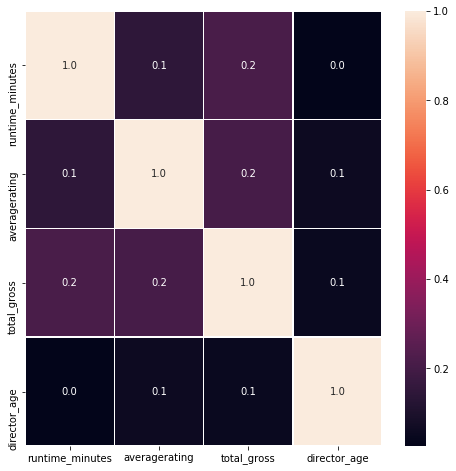

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline
# correlation map
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(correlation.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [47]:
movie_studio = movie_names.groupby('primary_name')
movie_studio.head()

,nconst,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,...,death_year,primary_profession,known_for_titles,title,studio,domestic_gross,foreign_gross,year,total_gross,director_age
0,nm0005271,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,10,...,NaN,"soundtrack,music_department,composer","tt0435761,tt0114709,tt0780521,tt0212338",Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,77.0
1,nm0000158,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,1,...,NaN,"producer,actor,soundtrack","tt0094737,tt0162222,tt0120815,tt0109830",Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,64.0
2,nm0000741,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,2,...,NaN,"actor,producer,miscellaneous","tt0111070,tt0114709,tt0101120,tt0177789",Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,67.0
3,nm0000349,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,3,...,NaN,"actress,soundtrack,writer","tt0096463,tt0119229,tt1659337,tt0119360",Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,58.0
4,nm0000885,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,4,...,NaN,"actor,soundtrack","tt0068473,tt0074958,tt0822854,tt0078346",Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24815,nm1467663,tt5718046,An Actor Prepares,An Actor Prepares,2018,97.0,Comedy,5.0,388,5,...,NaN,"producer,director,writer","tt2141941,tt2737622,tt5718046,tt1037090",An Actor Prepares,Grav.,1700.0,NaN,2018,NaN,NaN
24816,nm2659289,tt5718046,An Actor Prepares,An Actor Prepares,2018,97.0,Comedy,5.0,388,6,...,NaN,"writer,actor,miscellaneous","tt1247692,tt1037090,tt5718046,tt3703512",An Actor Prepares,Grav.,1700.0,NaN,2018,NaN,42.0
24817,nm1520505,tt5718046,An Actor Prepares,An Actor Prepares,2018,97.0,Comedy,5.0,388,7,...,NaN,"producer,production_manager,executive","tt2788716,tt1724597,tt5718046",An Actor Prepares,Grav.,1700.0,NaN,2018,NaN,NaN
24818,nm1396395,tt5718046,An Actor Prepares,An Actor Prepares,2018,97.0,Comedy,5.0,388,8,...,NaN,"producer,manager,writer","tt0371257,tt1758795,tt2575988,tt1631867",An Actor Prepares,Grav.,1700.0,NaN,2018,NaN,NaN


In [51]:
#select only the numbers in df
df_num = movie_names.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,start_year,runtime_minutes,averagerating,numvotes,ordering,birth_year,death_year,domestic_gross,foreign_gross,year
0,2010,103.0,8.3,682218,10,1943.0,NaN,415000000.0,652000000.0,2010
1,2010,103.0,8.3,682218,1,1956.0,NaN,415000000.0,652000000.0,2010
2,2010,103.0,8.3,682218,2,1953.0,NaN,415000000.0,652000000.0,2010
3,2010,103.0,8.3,682218,3,1962.0,NaN,415000000.0,652000000.0,2010
4,2010,103.0,8.3,682218,4,1937.0,NaN,415000000.0,652000000.0,2010


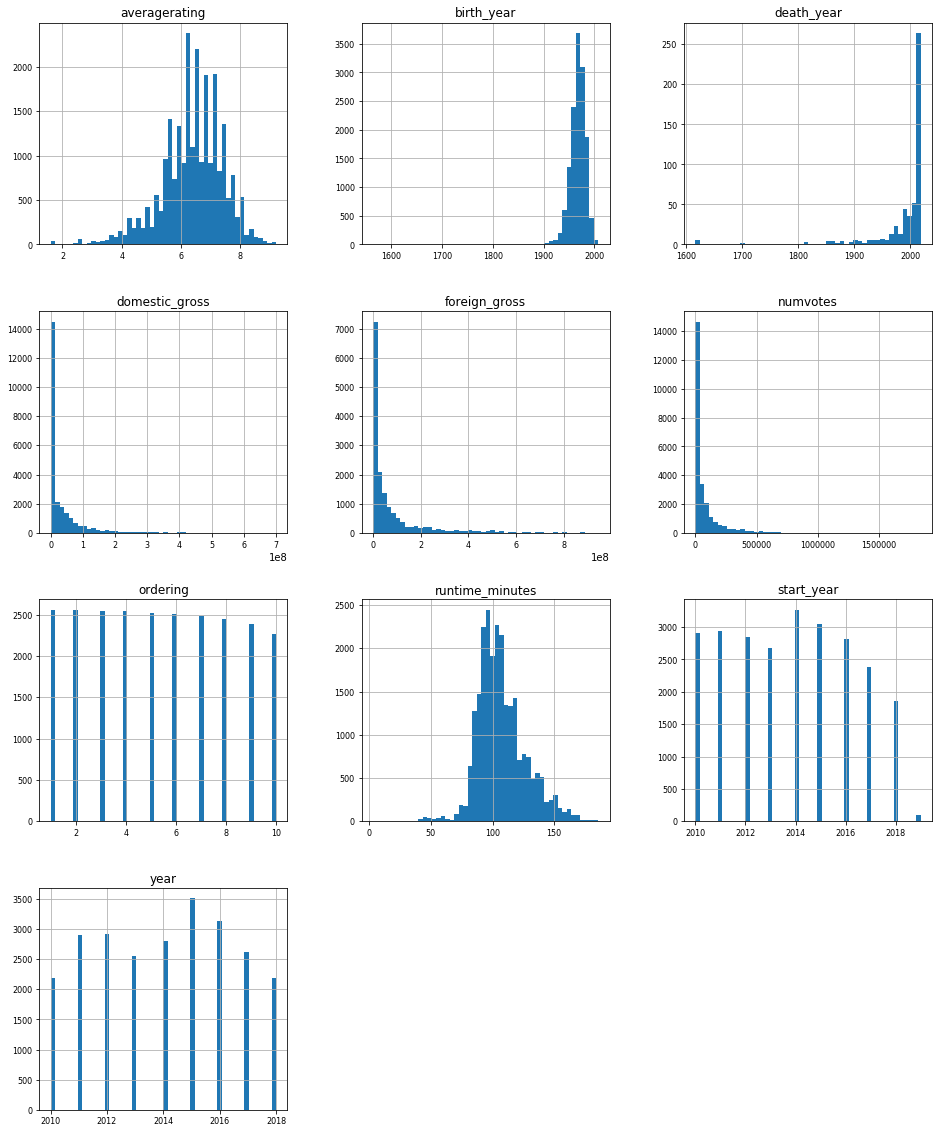

In [52]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # plot everything

In [54]:
df_num_corr = df_num.corr()['domestic_gross'][:-3] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with domestic gross:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with domestic gross:
numvotes    0.665631
Name: domestic_gross, dtype: float64


In [ ]:
# quantitative_features_list[:-1] as the last column is SalePrice and we want to keep it
categorical_features = [a for a in movie_names[:-3] + .columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]
df_categ = df[categorical_features]
df_categ.head()